In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [15]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## DATA PREPROCESSING

In [16]:
data.shape

(7920, 3)

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [19]:
import re
import string

convert uppercase to lowercase

In [20]:
data["tweet"]=data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [21]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [22]:
data["tweet"]=data["tweet"].apply(lambda x:" ".join(re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',x,flags=re.MULTILINE) for x in x.split()))

In [23]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuation

In [24]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)    

In [25]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove the numbers


In [27]:
# Remove digits from the 'tweet' column
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)


In [28]:
!pip install nltk

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 905.1 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 1.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 971.1 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
Using cached click-8.1.8-py3-none-any.whl (98 kB)


In [29]:
import nltk

In [30]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [32]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

Stemming

In [37]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [38]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))

In [39]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

### Building Vocabulary

In [42]:
from collections import Counter
vocab=Counter()

In [43]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [44]:
len(vocab)

15908

In [45]:
tokens=[key for key in vocab if vocab[key]>10]

In [46]:
len(vocab)

15908

In [47]:
len(tokens)

1146

In [48]:
def save_vocabulary(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')    

### Divide dataset

In [49]:
X=data['tweet']
y=data['label']

In [50]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [51]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.0 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.1 MB 1.0 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.1 MB 1.1 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.1 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.1 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.1 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.1 MB 1.0 MB/s eta 0:00:10
   ------- -------------------------------- 2.1/11.1 MB 978.3 kB/s eta 0:00:10
   ------- -------------------------------- 2.1/11.1 MB 978.3 kB/s eta 0:00:10
   ------- ------------

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [56]:
X_train.shape

(6336,)

In [57]:
X_test.shape

(1584,)

### Vectorization

In [58]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [59]:
vectorized_x_train=vectorizer(X_train,tokens)

In [60]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1146), dtype=float32)

In [61]:
vectorized_x_test=vectorizer(X_test,tokens)

In [63]:
y_train.value_counts()

label
0    4734
1    1602
Name: count, dtype: int64

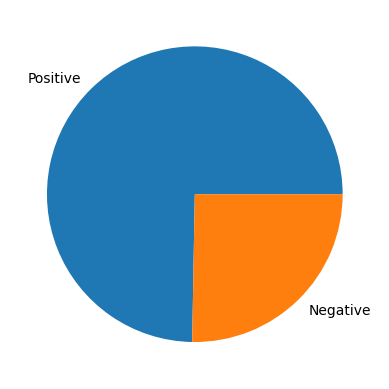

In [64]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle inbalanced dataset

In [66]:
!pip install imbalanced-learn

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9468, 1146) (9468,)


In [68]:
y_train_smote.value_counts()


label
1    4734
0    4734
Name: count, dtype: int64

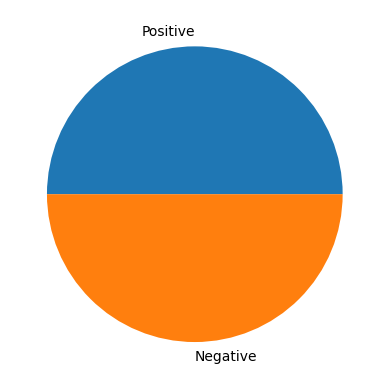

In [69]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Model Building and Evaluation

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [72]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [73]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [74]:
y_train_pred

array([1, 0, 0, ..., 1, 1, 1], shape=(9468,))

In [75]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.923
	Recall = 0.966
	F1-Score = 0.944


In [77]:
y_test_pred = lr.predict(vectorized_x_test)

In [78]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.868
	Precision = 0.72
	Recall = 0.83
	F1-Score = 0.771


### Naive Bayes

In [79]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.91
	Precision = 0.872
	Recall = 0.961
	F1-Score = 0.914
Testing Scores:
	Accuracy = 0.86
	Precision = 0.68
	Recall = 0.906
	F1-Score = 0.777


### Decision Tree

In [80]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.832
	Precision = 0.694
	Recall = 0.667
	F1-Score = 0.68


###  Random Forest

In [81]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.86
	Precision = 0.76
	Recall = 0.7
	F1-Score = 0.729


### Support Vector Machine

In [82]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.98
	Precision = 0.965
	Recall = 0.997
	F1-Score = 0.981
Testing Scores:
	Accuracy = 0.881
	Precision = 0.761
	Recall = 0.811
	F1-Score = 0.785


In [83]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)